/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/keras/optimizers/optimizer_v2/gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Found 22424 images belonging to 10 classes.
Found 22424 images belonging to 10 classes.
Epoch 1/10


2023-05-11 09:01:46.829367: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential/dropout/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


700/700 [==============================] - 519s 731ms/step - loss: 1.2637 - accuracy: 0.5946 - val_loss: 1.6434 - val_accuracy: 0.4998
Epoch 2/10
700/700 [==============================] - 392s 560ms/step - loss: 0.4793 - accuracy: 0.8487 - val_loss: 0.4009 - val_accuracy: 0.8771
Epoch 3/10
700/700 [==============================] - 392s 561ms/step - loss: 0.2997 - accuracy: 0.9057 - val_loss: 0.2808 - val_accuracy: 0.9075
Epoch 4/10
700/700 [==============================] - 387s 553ms/step - loss: 0.2233 - accuracy: 0.9299 - val_loss: 0.1426 - val_accuracy: 0.9533
Epoch 5/10
700/700 [==============================] - 385s 550ms/step - loss: 0.1759 - accuracy: 0.9471 - val_loss: 0.1674 - val_accuracy: 0.9485
Epoch 6/10
700/700 [==============================] - 388s 554ms/step - loss: 0.1384 - accuracy: 0.9591 - val_loss: 0.4643 - val_accuracy: 0.8398
Epoch 7/10
700/700 [==============================] - 394s 563ms/step - loss: 0.1258 - accuracy: 0.9613 - val_loss: 0.3023 - val_accura

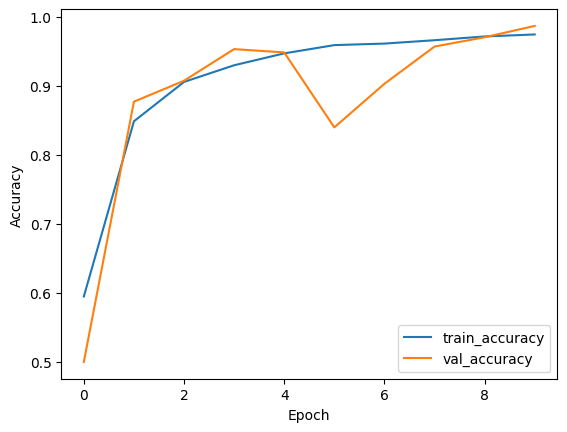

In [1]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from keras.preprocessing.image import ImageDataGenerator

# set the input shape
input_shape = (224, 224, 3)

# create the model
model = Sequential()

# add convolutional layers
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
model.add(BatchNormalization())
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(256, kernel_size=(3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# flatten and add dense layers for classification
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

from keras import optimizers

model.compile(optimizer=optimizers.SGD(lr=0.01), loss='categorical_crossentropy', metrics=['accuracy'])


# create data generators for data augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

# set the batch size
batch_size = 32

# create the training data generator
train_generator = train_datagen.flow_from_directory(
    '/kaggle/input/distracted-driver-dataset/imgs/train',
    target_size=input_shape[:2],
    batch_size=batch_size,
    class_mode='categorical')

# create the validation data generator
validation_generator = test_datagen.flow_from_directory(
    '/kaggle/input/distracted-driver-dataset/imgs/train',
    target_size=input_shape[:2],
    batch_size=batch_size,
    class_mode='categorical')

# train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.n // batch_size,
    epochs=10,
    validation_data=validation_generator,
    validation_steps=validation_generator.n // batch_size)

# plot the training history
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'], label='train_accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()

# Save the model to a file
model.save('model.h5')



In [3]:
model.save('model.h5')


In [4]:
import os
import numpy as np
from PIL import Image
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import keras

# Set data directory path
data_dir = '/kaggle/input/distracted-driver-dataset/imgs/train'

# Define the classes of the State Farm dataset
classes = ['c0', 'c1', 'c2', 'c3', 'c4', 'c5', 'c6', 'c7', 'c8', 'c9']

# Create a dictionary to map each class to a unique integer
class_to_int = {classes[i]: i for i in range(len(classes))}

# Load the images and labels into arrays
image_paths = []
labels = []
for c in classes:
    class_dir = os.path.join(data_dir, c)
    for img_file in os.listdir(class_dir):
        img_path = os.path.join(class_dir, img_file)
        image_paths.append(img_path)
        labels.append(class_to_int[c])

# Split the data into training and validation sets
train_paths, val_paths, train_labels, val_labels = train_test_split(image_paths, labels, test_size=0.2, random_state=42)

# Define the image data generator for data augmentation
train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=10,
                                   width_shift_range=0.1,
                                   height_shift_range=0.1,
                                   shear_range=0.1,
                                   zoom_range=0.1,
                                   horizontal_flip=True,
                                   fill_mode='nearest')

val_datagen = ImageDataGenerator(rescale=1./255)

# Define the generator for training data
train_generator = train_datagen.flow_from_directory(
    data_dir,
    target_size=(224, 224),
    batch_size=32,
    classes=classes,
    class_mode='categorical',
    subset='training',
    shuffle=True,
    seed=42)

# Define the generator for validation data
val_generator = val_datagen.flow_from_directory(
    data_dir,
    target_size=(224, 224),
    batch_size=32,
    classes=classes,
    class_mode='categorical',
    subset='validation',
    shuffle=False)

# Define the model architecture
model = keras.Sequential([
    keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(64, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(128, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(len(classes), activation='softmax')
])

# Compile the model with categorical crossentropy loss and Adam optimizer
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model using the generators
history = model.fit(train_generator, epochs=10, validation_data=val_generator)

# Evaluate the model on the test set
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
    '/kaggle/input/distracted-driver-dataset/imgs/test',
    target_size=(224, 224),
    batch_size=32,
    classes=classes,
    class_mode='categorical',
    shuffle=False
)

Found 22424 images belonging to 10 classes.
Found 0 images belonging to 10 classes.
Epoch 1/10
701/701 [==============================] - 431s 612ms/step - loss: 1.6810 - accuracy: 0.3886
Epoch 2/10
701/701 [==============================] - 325s 464ms/step - loss: 0.8211 - accuracy: 0.7162
Epoch 3/10
701/701 [==============================] - 321s 458ms/step - loss: 0.5105 - accuracy: 0.8334
Epoch 4/10
701/701 [==============================] - 323s 460ms/step - loss: 0.3753 - accuracy: 0.8744
Epoch 5/10
701/701 [==============================] - 325s 464ms/step - loss: 0.3036 - accuracy: 0.9031
Epoch 6/10
701/701 [==============================] - 324s 463ms/step - loss: 0.2713 - accuracy: 0.9108
Epoch 7/10
701/701 [==============================] - 326s 465ms/step - loss: 0.2299 - accuracy: 0.9267
Epoch 8/10
701/701 [==============================] - 322s 459ms/step - loss: 0.2086 - accuracy: 0.9331
Epoch 9/10
701/701 [==============================] - 322s 459ms/step - loss: 0.1959

In [5]:
model.save('mymodel.h5')